https://www.bostonglobe.com/metro/2017/06/20/for-some-boston-police-officers-extra-money-comes-easy/oS47lc7OuYyVZbTPBv1zQL/story.html

# For some Boston officers, extra money comes easy

### By Jan Ransom GLOBE STAFF  JUNE 21, 2017

A Boston police detective made more than four times his base salary last year, increasing his pay through a contract provision that allowed him to receive roughly four months of overtime for hours he didn’t work, records show.

Boston Police Detective Waiman Lee, a 34-year department veteran in the domestic violence unit, took home about $403,000 in 2016, making him the highest paid city employee last year, according to payroll records. His base salary was $92,515.

In what critics call an extreme example of a systemic problem, Lee bolstered his wages thanks to police union contracts that require that officers who work detail shifts or testify in court be paid a minimum of four hours, even if the assignment lasts only 30 minutes.

Last year, Lee earned $58,600 by working more than 1,100 hours of overtime, according to a Globe review of police payroll records. Records show that Lee did not work 674 of those hours — more than 16 40-hour weeks — yet received time-and-a-half pay.

Get Fast Forward in your inbox:
Forget yesterday's news. Get what you need today in this early-morning email.

Enter email address
Sign Up
Most of Lee’s overtime pay stemmed from court appearances that typically lasted no more than an hour, the Globe found. He was also paid for 2,771 hours for detail shifts, including 861 unworked hours. That allowed him to make close to $130,000, a sum that did not include his overtime pay.

“It’s a generous system,” said Sam Tyler, president of the Boston Municipal Research Bureau, a fiscal watchdog group. “You’re paid for hours you don’t work. It isn’t a new issue, but it’s one that really does need stricter focus and management to control those costs.”

Lee declined to comment about his wages Tuesday. Union leaders with the Boston Police Patrolmen’s Association and the Boston Police Detectives Benevolent Society did not respond to requests for comment.

Details about Lee’s wages were obtained through a public records request, which showed that some of the department’s highest paid and top overtime earners benefit immensely from contract requirements that allow overtime for unworked hours. Officers can work up to 90 hours a week.

The Globe reviewed the salary records of 10 officers who were among the highest overtime earners, and 10 additional officers who were the highest paid. Overall, the Police Department paid nearly $60 million in overtime in the 2016 fiscal year.

Lieutenant Detective Michael McCarthy, a department spokesman, said the four-hour requirement “is a contractual obligation that was bargained for between the city and the police unions over 20 years ago.”

“Officers are permitted under their current collective bargaining agreements to work additional assignments once they are relieved from their court obligation,” McCarthy said.

McCarthy said the department regularly audits officers’ time records to ensure compliance with internal rules and procedures, and has not found any violations recently.

The generous contract provision demonstrates the union’s ability, over the years, to demand and win favorable terms in contract negotiations, observers say.

“Boston police have historically earned some of the highest salaries in the country,” said Thomas Nolan, a former Boston police officer who is now a criminology professor at Merrimack College in North Andover. “There has been a history of the police obtaining [contracts] and being very successful at the bargaining table.”

The department has faced questions on overtime pay before. A 2012 Globe review of officers in the drug unit found a pattern of overtime abuse by officers who were showing up to court when they were not needed. Ten officers were disciplined that year for collecting undeserved overtime pay.

A year earlier, the department conducted an internal audit that examined hundreds of cases in three courthouses around the city. The review found as many as 350 instances of questionable court overtime filings by drug unit officers, and recommended a centralized electronic subpoena system that would monitor court appearances in real time. A change in the use of court overtime slips — a record of the overtime an officer worked that day — took effect immediately.

Still, last year, the department paid $7.7 million in court overtime alone, down slightly from $8.6 million in 2011.

Of the 20 officers whose pay or overtime ranked among the highest the Globe reviewed, utility and construction companies paid an additional $630,000 to 10 of the officers for detail shifts, department records show. Some of those companies included utilities such as Eversource, which paid roughly $4 million in Boston police details in 2016, a cost added to the bills of its customers, a company spokesman said.

Public and private companies hire police officers for details, which are shifts in which officers direct traffic or provide security at construction sites or near roadwork. For construction and utility details that last more than four hours, the officer is paid for a minimum of eight hours, and then hourly after that, McCarthy said. For nonconstruction details that run beyond six hours, the officer is paid for a minimum of eight hours, followed by an hourly rate, he said.

Massachusetts became one of the last states in the country to allow civilian flaggers — rather than police officers — to work at construction sites in 2008. Two years later, the Globe reported tension between the Boston Police Department and the Massachusetts Department of Transportation over the use of civilian flaggers at city construction sites overseen by the state.

In [1]:
# import modules
import numpy as np
import pandas as pd
import re, os, glob
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
import seaborn as sns
from scipy import interpolate

# map functions
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM

# statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# scikit-learn machine learning
from sklearn.preprocessing import Normalizer, StandardScaler, normalize, scale
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, LinearRegression, SGDRegressor, RANSACRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict, cross_validate
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
from skopt import BayesSearchCV


# for graphing decision trees
import graphviz 
from sklearn.tree import export_graphviz

plt.style.use('seaborn-colorblind')

# special Jupyter Notebook command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("darkgrid")
sns.set_context("notebook")

In [2]:
# read cleaned data file
earnings = pd.read_csv('earnings.csv', index_col=False)
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152544 entries, 0 to 152543
Data columns (total 15 columns):
name           152544 non-null object
department     152544 non-null object
title          152544 non-null object
regular        152544 non-null float64
retro          152544 non-null float64
other          152544 non-null float64
overtime       152544 non-null float64
injured        152544 non-null float64
detail         152544 non-null float64
quinn          152544 non-null float64
total          152544 non-null float64
zip            152544 non-null object
year           152544 non-null int64
dept_clean     152544 non-null object
title_clean    152544 non-null object
dtypes: float64(8), int64(1), object(6)
memory usage: 17.5+ MB


# Classification based on job titles and departments

- extract the 10 most common job titles and 10 largest departments for 2017
- run classifiers on the numeric earnings data

### 1. Generate top 10 lists

In [3]:
"""
There are more than one thousand unique job titles for less than 20,000 employees in the city of Boston earnings database. 
Any meaningful classification of job titles will need to be limited. 

Likewise, of the more than 50 departments, some have only a handful of employees. For classification purposes the dataset
will be limited to the top 10 titles and departments.
"""
# get top 10 titles by number of employees
titles_top10 = earnings\
                .groupby('title_clean')\
                .agg('size')\
                .sort_values(ascending=False)\
                .index[:10]

# get top 10 departments by number of employees

departments_top10 = earnings\
                .groupby('dept_clean')\
                .agg('size')\
                .sort_values(ascending=False)\
                .index[:10]
print(titles_top10)
print(departments_top10)

Index(['Teacher', 'Police Officer', 'Paraprofessional', 'Fire Fighter', 'Substitute Teacher', 'Lunch Hour Monitors', 'Part-Time Cafeteria Attendant', 'Cab Monitor', 'Police Detective', 'Police Sergeant'], dtype='object', name='title_clean')
Index(['Boston Public Schools', 'Boston Police Department', 'Boston Fire Department', 'Boston Cntr - Youth & Families', 'Boston Public Library', 'Public Works Department', 'Traffic Division', 'Parks Department', 'Inspectional Services Dept', 'Public Facilities Department'], dtype='object', name='dept_clean')


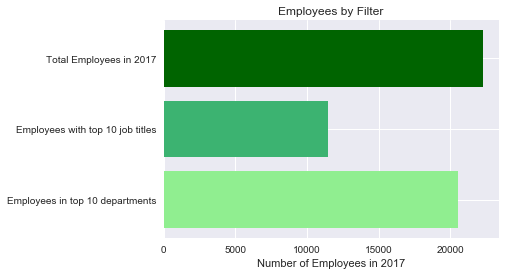

In [4]:
# top 10 titles and departments employees in 2017

# Number of employees in 2017
emp_2017 = earnings[earnings.year == 2017].shape[0]

# Employees with top 10 titles
emp_titles = earnings[earnings['title_clean'].isin(titles_top10) & (earnings.year == 2017)].shape[0]

# Employees in top 10 departments
emp_dept = earnings[earnings['dept_clean'].isin(departments_top10) & (earnings.year == 2017)].shape[0] 

data = {'Total Employees in 2017': emp_2017, 'Employees with top 10 job titles': emp_titles, 'Employees in top 10 departments': emp_dept}
category = list(data.keys())
employees = list(data.values())

plt.barh(category, employees, color=['darkgreen', 'mediumseagreen', 'lightgreen'])
plt.gca().invert_yaxis()
plt.title('Employees by Filter')
plt.xlabel('Number of Employees in 2017')
plt.show()

### 2. Regression: Predict total earnings

This is a trivial exercise since "total" is the sum of all other numerical columns.

In [7]:
# data for linear regression:

top10_t = earnings[(earnings['title_clean'].isin(titles_top10)) & (earnings['year'] == 2017)]

# remove non-numeric columns as well as "total" and "quinn"
X_lm = top10_t.drop(['name', 'department', 'title', 'quinn', 'total', 'zip', 'year', 'title_clean', 'dept_clean'], axis=1)

y_lm = top10_t['total']

# split into training and test datasets
X_lm_train, X_lm_test, y_lm_train, y_lm_test = train_test_split(X_lm, y_lm, test_size=0.2, random_state=26)

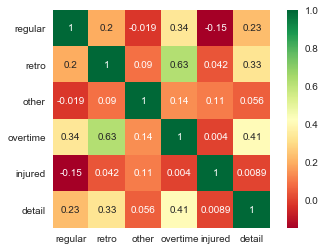

In [8]:
# heat map for identification of correlated data
sns.heatmap(X_lm.corr(), square=True, annot=True, cmap='RdYlGn')
plt.show()

The heat map above shows mostly red hues in the off-diagonal squares. This indicates low correlation between most of the earnings categories. Only "overtime" and "retro" show a green hue, suggesting that employees who collect overtime and more likely to collect retro earnings than those who don't.

In [9]:
# Linear Regression
lm = LinearRegression()

# Fit the regressor to the data
lm.fit(X_lm_train, y_lm_train)

print(pd.DataFrame(data={'features': X_lm.columns , 'estimatedCoefficients': list(lm.coef_)})\
      [['features', 'estimatedCoefficients']])

r_sq = lm.score(X_lm_test, y_lm_test)
print('The linear regression model explains {:.2f}% of the "total" earnings category prediction variance.'.format(r_sq*100))

   features  estimatedCoefficients
0   regular               1.005860
1     retro               1.564228
2     other               1.051744
3  overtime               1.085879
4   injured               1.053268
5    detail               1.055482
The linear regression model explains 99.50% of the "total" earnings category prediction variance.


Unsurprisingly, the linear regression model has an R-squared of almost 100%. This is an obvious result since the "total" is the numerical sum of the independent variables (Note that "quinn" earnings are removed from this dataset).

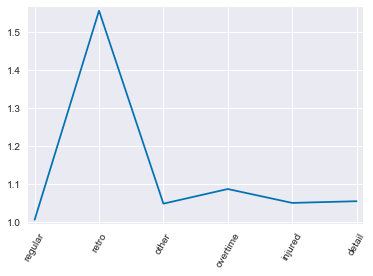

The linear regression model explains 99.50% of the job title prediction variance.


In [10]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X_lm_train, y_lm_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.plot(range(len(X_lm.columns)), lasso_coef)
plt.xticks(range(len(X_lm.columns)), X_lm.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

r_sq = lasso.score(X_lm_test, y_lm_test)
print('The linear regression model explains {:.2f}% of the job title prediction variance.'.format(r_sq*100))

"retro" is the most important coefficient for the prediction of total earnings.

In [11]:
# only "overtime" and "retro"
X_or = top10_t[['overtime', 'retro']][(top10_t['overtime'] != 0) & (top10_t['retro'] != 0)]

y_or = top10_t['total'][(top10_t['overtime'] != 0) & (top10_t['retro'] != 0)]

# split into training and test datasets
X_or_train, X_or_test, y_or_train, y_or_test = train_test_split(X_or, y_or, test_size=0.2, random_state=26)

# Fit the regressor to the data
lm.fit(X_or_train, y_or_train)

print(pd.DataFrame(data={'features': X_or.columns , 'estimatedCoefficients': list(lm.coef_)})\
      [['features', 'estimatedCoefficients']])

r_sq = lm.score(X_or_test, y_or_test)
print('The linear regression model explains {:.2f}% of the "total" earnings category prediction variance.'.format(r_sq*100))

   features  estimatedCoefficients
0  overtime               1.194063
1     retro               1.230856
The linear regression model explains 46.07% of the "total" earnings category prediction variance.


### 3. Cluster Analysis

In [12]:
# KMeans
kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X_lm)

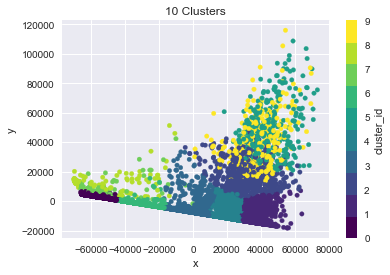

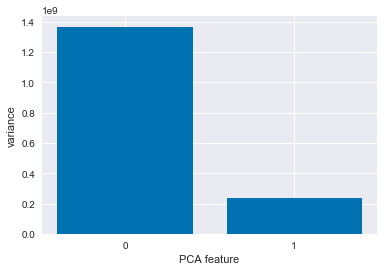

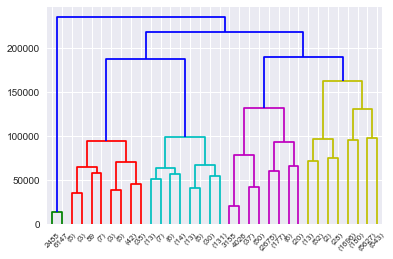

In [13]:
# reduce to two dimensions
pca = PCA(n_components=2)

components = pca.fit_transform(X_lm)

y_lm = top10_t['title_clean']

# add to data frame and plot
df_pca = pd.DataFrame({'title': y_lm, 'cluster_id': labels, 'x': components[:,0], 'y': components[:,1]})\
            .plot.scatter('x', 'y', c='cluster_id', cmap=plt.cm.get_cmap('viridis', 10), sharex=False, title='10 Clusters')

plt.show()

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

mergings = linkage(X_lm, method='complete')
dendrogram(mergings, p=5, truncate_mode='level')
plt.show()

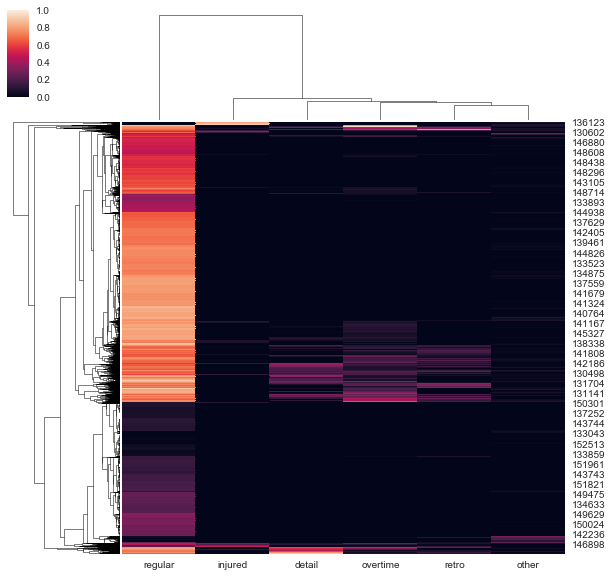

In [15]:
sns.clustermap(X_lm, metric="euclidean", standard_scale=1)
plt.show()

Principal component analysis with cluster labels from a KMeans classfier show no clear boundaries between points. This suggests that job titles can not be predicted by the earnings data with sufficient accuracy. Likewise, it is difficult to identify an appropriate cutoff value for a dendrogram such that exactly 10 clusters (= job titles) are generated.

### 4. Classification by job title

In [16]:
# data for classifiers:

# remove non-numeric columns as well as "total" and "quinn"
X = top10_t.drop(['name', 'department', 'title', 'total', 'zip', 'year', 'title_clean', 'dept_clean'], axis=1)
y = top10_t['title_clean']

# split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)
y_test.shape[0]

3429

In [17]:
# Instantiate a RidgeClassifier:
rclf = RidgeClassifier(alpha=0.01, normalize=True)

# Fit the regressor to the data
rclf.fit(X_train, y_train)

# Compute and print the coefficients
rclf_coef = rclf.coef_

r_sq = rclf.score(X_test, y_test)
print('The ridge classifier correctly identifies {:.2f}% of the job titles.'.format(r_sq*100))

The ridge classifier correctly identifies 59.26% of the job titles.


Test set score: 0.78
Confusion Matrix:
                               0     1   2    3  4    5     6    7    8     9  count  score
Cab Monitor                    0     0  11  233  0    0     0    0   54     8    306   0.00
Fire Fighter                   0  1049   1    3  0    0    22    2    2    45   1124  93.33
Lunch Hour Monitors            0     0  10   34  0    0     0    0  314     2    360   2.78
Paraprofessional               0     1  51  996  0    0     0    0   88    79   1215  81.98
Part-Time Cafeteria Attendant  0     0  61  158  0    0     0    0   65    50    334   0.00
Police Detective               0     0   0    0  0  178   115    0    4     1    298  59.73
Police Officer                 0    11   4   90  0   27  1423    0   54     7   1616  88.06
Police Sergeant                0    12   0    0  0    7    31  241    1     7    299  80.60
Substitute Teacher             0     0  18   87  0    0     0    0  325    11    441  73.70
Teacher                        0     4  1

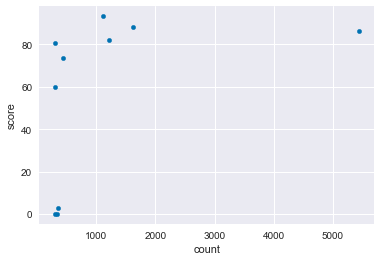

In [18]:
# support vector classifier

steps = [('scaler', StandardScaler()), ('clf', svm.SVC())]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

# metrics:
print('Test set score: {:.2f}'.format(pipeline.score(X_test, y_test)))

pred = pipeline.predict(X)
# a2 = metrics.accuracy_score(y_test, pred)
# print('Accuracy:', a2)
print('Confusion Matrix:')
cm = pd.DataFrame(metrics.confusion_matrix(y, pred)).set_index(np.sort(top10_t['title_clean'].unique()))
cm['count'] = cm.sum(axis=1)
cm['score'] = 0
for row in range(10):
    cm.iloc[row, 11] = round(cm.iloc[row, row] / cm.iloc[row, 10] * 100, 2)
print(cm)
cv_scores = cross_val_score(pipeline, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))
cm.plot.scatter('count', 'score')
plt.show()


After scaling the independent variables, the SVC classifier correctly predicts the job title approximately 77% of the time. The most accurate predictions are for fire fighters and police officers. The least accurate predictions are for cab monitors and lunch hour monitors. The latter two jobs have a low count and are not full time positions, therefore most of the features are empty, i.e. "0". 

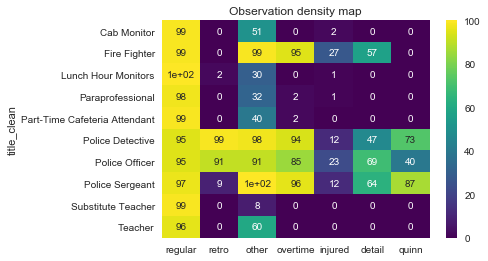

In [19]:
# Observation density map

feature_matrix = top10_t[['name', 'regular', 'retro', 'other', 'overtime', 'injured', 'detail', 'quinn', 'title_clean']] \
                        .groupby('title_clean') \
                        .apply(lambda x: (x != 0).sum())\
                        .apply(lambda y: (y/y['name']*100).astype(int), axis=1)\
                        .drop(['name', 'title_clean'], axis=1)
sns.heatmap(feature_matrix, annot=True, cmap='viridis')
plt.title('Observation density map')
plt.show()

The heatmap above shows the percentage of entries which greater than zero for a given feature, i.e. earnings category. For example, at least 95% of observations for any title have non-zero "regular" entries, but no more than 27% of observations for any title have entries for the "injured" category. 

From this map and the confusion matrix above we can conclude that classification will be very difficult for the following job titles due to low number of feature/observation combinations:

* Cab Monitor
* Lunch Hour Monitors
* Paraprofessional
* Part-Time Cafeteria Attendant
* Substitute Teacher

The "Teacher" title should probably be excluded as well, but this is by far the largest group of observations.

We can also conclude that the "injured" feature is unlikely to have much impact and could be excluded with little loss of accuracy.

Lastly the confusion matrix shows substantial error for "Police Detectives", classifying this title as "Police Officer" in more than one-third of cases. An internet search found that a police detective is considered a police officer who performs detective work. In terms of earnings there is little difference and the two titles should be merged.

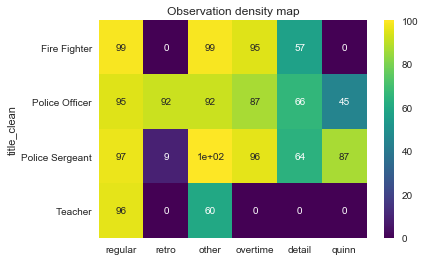

Confusion Matrix:
                    0     1    2     3  count   score
Fire Fighter     1030     8    2    84   1124   91.64
Police Officer      6  1727    0   181   1914   90.23
Police Sergeant    11    33  247     8    299   82.61
Teacher             0     0    0  5437   5437  100.00
Accuracy: 0.955 (+/- 0.079)


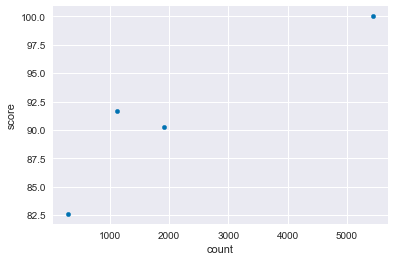

In [20]:
# re-run pipeline with reduced dataset:
new_titles = ['Fire Fighter', 'Police Detective', 'Police Officer', 'Police Sergeant', 'Teacher']

top10_new = top10_t[['name','regular', 'retro', 'other', 'overtime', 'detail', 'quinn', 'title_clean', 'dept_clean']] \
                    [top10_t['title_clean'].isin(new_titles)]
    
# merge detectives and police officers    
top10_new['title_clean'].replace({'Police Detective': 'Police Officer'}, inplace=True)

# Observation density map
feature_matrix = top10_new.groupby('title_clean') \
                        .apply(lambda x: (x != 0).sum())\
                        .apply(lambda y: (y/y['name']*100).astype(int), axis=1)\
                        .drop(['name', 'title_clean', 'dept_clean'], axis=1)
sns.heatmap(feature_matrix, annot=True, cmap='viridis')
plt.title('Observation density map')
plt.show()

# define classification data
X = top10_new.drop(['name', 'title_clean', 'dept_clean'], axis=1)
y = top10_new['title_clean']

# fit the pipeline
pipeline.fit(X, y)
pred = pipeline.predict(X)

# metrics:
print('Confusion Matrix:')
cm = pd.DataFrame(metrics.confusion_matrix(y, pred)).set_index(np.sort(top10_new['title_clean'].unique()))
cm['count'] = cm.sum(axis=1)
cm['score'] = 0
for row in range(4):
    cm.iloc[row, 5] = round(cm.iloc[row, row] / cm.iloc[row, 4] * 100, 2)
print(cm)
cv_scores = cross_val_score(pipeline, X, y, cv=10)
print("Accuracy: %0.3f (+/- %0.3f)" % (cv_scores.mean(), cv_scores.std() * 2))
cm.plot.scatter('count', 'score')
plt.show()


The revised results show that classification accuracy is closely correlated with the number of employees (or observations). The accuracy is 96% before optimization and cross validation.

In [ ]:
# hyper-parameter tuning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=26)

param_grid = {'C': [0.001, 0.1, 1, 10],
              'gamma': [0.0001, 0.001, 0.01, 0.1]}

gs = GridSearchCV(svm.SVC(), param_grid, cv=5)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
# cv_scores = cross_val_score(lrc, X, y, cv=10, scoring='roc_auc')
# print('mean cv score:', np.mean(cv_scores), '\n')


In [ ]:
from skopt import BayesSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=26)

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    svm.SVC(),
    {
        'C': (1e-3, 1e+3, 'log-uniform'),  
        'gamma': (1e-3, 1e+1, 'log-uniform'),
#         'degree': (3, 5),  # integer valued parameter
        'kernel': ['linear', 'rbf'],  # categorical parameter  , 'poly'
    },
    n_iter=6
)

opt.fit(X_train, y_train)

print("Parameters: ", opt.best_params_)
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

In [22]:
# Using optimized hyper-parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)
steps = [('scaler', StandardScaler()), ('clf', svm.SVC(C=1000, kernel='linear', gamma=0.01))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)
cv_scores = cross_val_score(pipeline, X_test, y_test, cv=5)
print("Accuracy: %0.3f (+/- %0.3f)" % (cv_scores.mean(), cv_scores.std() * 2))

KeyboardInterrupt: 

In [23]:

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=3)

# Apply the SelectKBest object to the features and target
# steps = [('scaler', StandardScaler()), (fvalue_selector), ('clf', svm.SVC(C=1000, gamma=0.01))]
pipeline = make_pipeline(StandardScaler(), fvalue_selector, svm.SVC(C=1000, kernel='linear', gamma=0.01))
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
# cv_scores = cross_val_score(pipeline, X, y, cv=5)
# print("Accuracy: %0.3f (+/- %0.3f)" % (cv_scores.mean(), cv_scores.std() * 2))


                 precision    recall  f1-score   support

   Fire Fighter       0.98      0.94      0.96       358
 Police Officer       0.98      0.92      0.95       576
Police Sergeant       0.97      0.79      0.87        81
        Teacher       0.96      1.00      0.98      1618

    avg / total       0.97      0.97      0.97      2633



                   0    1   2     3  count  score
Fire Fighter     337    2   0    19    358  94.13
Police Officer     3  528   2    43    576  91.67
Police Sergeant    4   11  64     2     81  79.01
Teacher            1    0   0  1617   1618  99.94
Accuracy: 0.96 (+/- 0.02)


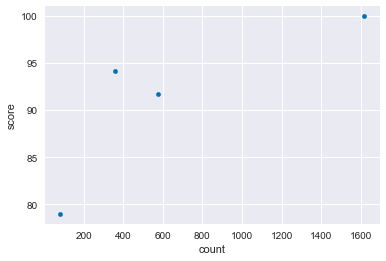

In [24]:
# split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

# metrics:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, pred)).set_index(np.sort(top10_new['title_clean'].unique()))
cm['count'] = cm.sum(axis=1)
cm['score'] = 0
for row in range(4):
    cm.iloc[row, 5] = round(cm.iloc[row, row] / cm.iloc[row, 4] * 100, 2)
print(cm)
cv_scores = cross_val_score(pipeline, X_test, y_test, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))
cm.plot.scatter('count', 'score')
plt.show()


In [25]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=5, random_state=26).fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   Fire Fighter       0.99      0.95      0.97       358
 Police Officer       0.98      0.97      0.97       576
Police Sergeant       1.00      0.89      0.94        81
        Teacher       0.98      1.00      0.99      1618

    avg / total       0.98      0.98      0.98      2633



### 5. Classification by department

In [26]:
# data for classifiers (now including quinn):
top10_d = earnings[(earnings['dept_clean'].isin(departments_top10)) & (earnings['year'] == 2017)]

# remove non-numeric columns as well as "total" and "quinn"
X = top10_d.drop(['name', 'department', 'title', 'quinn', 'total', 'zip', 'year', 'title_clean', 'dept_clean'], axis=1)

# factorize job titles
# y = pd.factorize(top10['title_clean'])[0]
y = top10_d['dept_clean']

# split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)
X_test.shape[0]

4113

                                0    1    2  3     4  5  6  7   8  9  count  score
Boston Cntr - Youth & Families  0    0    0  0   107  0  0  0   0  0    107   0.00
Boston Fire Department          0  277   26  0    21  0  0  0   2  0    326  84.97
Boston Police Department        0   27  450  0   169  1  0  0   1  0    648  69.44
Boston Public Library           0    1    1  0   104  0  0  0   0  0    106   0.00
Boston Public Schools           0   10   11  0  2587  0  0  0   0  0   2608  99.19
Inspectional Services Dept      0    2   29  0    15  0  0  0   0  0     46   0.00
Parks Department                0    1   19  0    40  0  0  0   5  0     65   0.00
Public Facilities Department    0    1    5  0    25  0  0  9   1  0     41  21.95
Public Works Department         0    3   36  0    20  0  0  0  27  0     86  31.40
Traffic Division                0    0   59  0    16  0  0  0   5  0     80   0.00


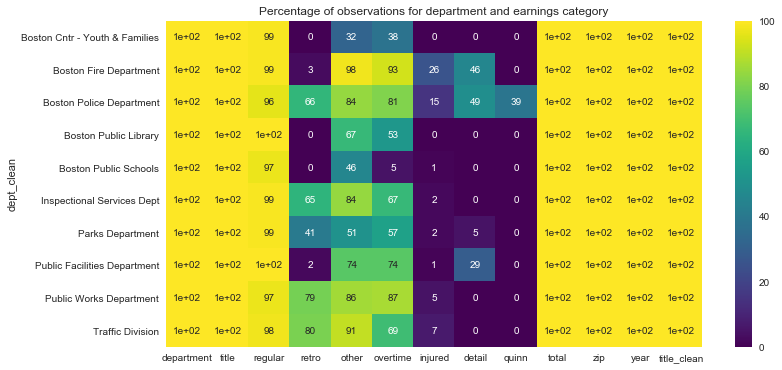

In [27]:
# support vector classifier

steps = [('scaler', StandardScaler()), ('clf', svm.SVC())]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

y_pred = cross_val_predict(pipeline, X_test, y_test, cv=5)

# confusion matrix
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)).set_index(np.sort(top10_d['dept_clean'].unique()))
cm['count'] = cm.sum(axis=1)
cm['score'] = 0
for row in range(10):
    cm.iloc[row, 11] = round(cm.iloc[row, row] / cm.iloc[row, 10] * 100, 2)
print(cm)

# cross validation
# cv_scores = cross_val_score(pipeline, X, y, cv=10)
# print('mean cv score: {:.2f}'.format(np.mean(cv_scores)))

feature_matrix = top10_d.groupby('dept_clean') \
                        .apply(lambda x: (x != 0).sum())\
                        .apply(lambda y: (y/y['name']*100).astype(int), axis=1)\
                        .drop(['name', 'dept_clean'], axis=1)

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(feature_matrix, annot=True, cmap='viridis', ax=ax)
ax.set_title('Percentage of observations for department and earnings category')
plt.show()

## Are teachers from different schools paid the same?

In 2017 the "department" category lists each school as its own department. 

First we need to exclude school departments with few teachers in order for the statistical calculations to be significant. We'll add substitute teachers and paraprofessionals to the data.

In [28]:
# Return list of largest schools

schoolsize = earnings[(earnings.title_clean.isin(['Teacher', 'Substitute Teacher', 'Paraprofessional']))\
                   & (earnings.year == 2017)] \
                    .groupby('department')['name']\
                    .agg('count')
largeschools = schoolsize[schoolsize > 100].index  # minimum number of teachers
len(largeschools)

16

Teachers are not paid overtime, detail or quinn, so we can remove these categories. 

In [29]:
# using original school departments

schools = earnings[['name','regular', 'retro', 'other', 'total', 'title_clean', 'department']]\
                    [(earnings.title_clean.isin(['Teacher', 'Substitute Teacher', 'Paraprofessional'])) \
                    & (earnings.department.isin(largeschools))\
                    & (earnings.year == 2017)]
X = schools.drop(['name', 'total', 'title_clean', 'department'], axis=1)
y = schools['department']
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

# Knn
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

# metrics:
print('Score:', clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
cv_scores = cross_val_score(clf, X, y, cv=10)

print('mean cv score:', np.mean(cv_scores), '\n')
print(metrics.classification_report(y_test, y_pred))

(2344, 3)
Score: 0.2869318181818182
mean cv score: 0.2926467383286989 

                               precision    recall  f1-score   support

             BPS Boston Latin       0.20      0.43      0.27        42
         BPS Charlestown High       0.03      0.03      0.03        31
        BPS Condon Elementary       0.09      0.09      0.09        33
         BPS East Boston High       0.06      0.05      0.06        39
      BPS Human Resource Team       0.25      0.24      0.25        37
           BPS Lee Elementary       0.09      0.13      0.11        30
        BPS Madison Park High       0.05      0.06      0.06        34
          BPS McKinley Middle       0.23      0.32      0.27        38
BPS Orchard Gardens K-8 Pilot       0.05      0.03      0.04        36
        BPS Quincy Elementary       0.12      0.03      0.04        39
        BPS Special Education       0.31      0.43      0.36        79
 BPS Substitute Teachers/Nurs       0.69      0.92      0.78       121
    

The accuracy and f1-score for predicting a school from the earnings categories is only ~25%. This result suggests there is no significant difference, though it appears the ***BPS Substitute Teachers/Nurs*** department is distinct from the rest. These are likely part time jobs and shouldn't be considered. Of course a proper statistical analysis would be appropriate too:

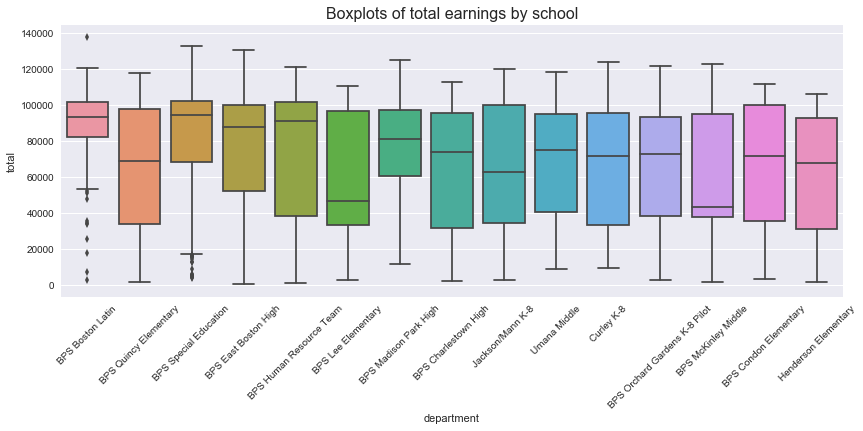

                  sum_sq      df         F        PR(>F)
department  1.262818e+11    14.0  9.038371  1.726863e-19
Residual    1.884189e+12  1888.0       NaN           NaN
Effect size: 6.28% of the total earnings variance is explained by the associated school.


group1,group2,meandiff,lower,upper,reject
BPS Boston Latin,BPS Charlestown High,-23081.2464,-37247.7509,-8914.7419,True
BPS Boston Latin,BPS Condon Elementary,-20474.6112,-34490.0297,-6459.1927,True
BPS Boston Latin,BPS East Boston High,-12885.7956,-26327.1824,555.5911,False
BPS Boston Latin,BPS Human Resource Team,-15908.5477,-29349.9345,-2467.1609,True
BPS Boston Latin,BPS Lee Elementary,-27328.8942,-41135.2467,-13522.5418,True
BPS Boston Latin,BPS Madison Park High,-13094.3018,-26563.7292,375.1255,False
BPS Boston Latin,BPS McKinley Middle,-28220.1748,-41216.5422,-15223.8074,True
BPS Boston Latin,BPS Orchard Gardens K-8 Pilot,-20808.0942,-35013.974,-6602.2144,True
BPS Boston Latin,BPS Quincy Elementary,-22403.6677,-36243.5062,-8563.8292,True
BPS Boston Latin,BPS Special Education,-6917.5488,-18267.1416,4432.0439,False


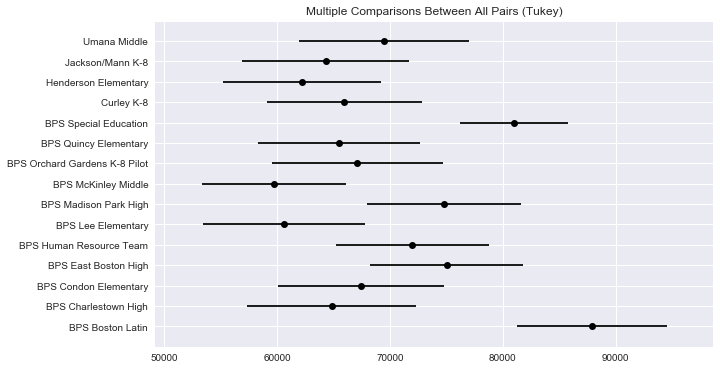

In [30]:
""" ANOVA analysis of total earnings by school"""

# Remove substitute teachers:
schools = schools[schools.department != 'BPS Substitute Teachers/Nurs']

# Box plot:
fig, ax = plt.subplots(figsize=(14,5))
sns.boxplot(x='department', y='total', data=schools, ax=ax)
ax.set_title('Boxplots of total earnings by school', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# OLS model:
model = ols('total ~ department',
                data=schools).fit()
# ANOVA:                
aov_table = anova_lm(model, typ=2)
print(aov_table)

# effect size
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('Effect size: {:.2f}% of the total earnings variance is explained by the associated school.'.format(esq_sm*100))

# Tukey's comparison:
tukey = pairwise_tukeyhsd(endog=schools['total'],     # Data
                          groups=schools['department'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()              # See test summary

The boxplots show high variance for earnings totals across select schools. The low variance for ***BPS Boston Latin*** could be due to low turnover since the data has not been adjusted for mid-year employment changes. Supporting the theory of low turnover are the next two lowest variance schools, ***BPS Madison Park High***, the only vocational school in Boston, and ***BPS Special Education***. These are two specialist schools that would imply teachers transfering to other schools is less likely. 

Overall the ANOVA results suggest teacher income is dependent on which school they teach at. Only about 6% of the variance in total earnings can be explained by the associated school. However, many schools are similar to each other and cannot be statistically distinguished by total earnings alone.

In [ ]:
"""
compound annual growth rate

1. An arbitrary limit is set on "first" since low earnings are often not full time positions
2. An arbitrary cap on the growth rate result is needed for new hires whose first year earnings are not a full year
3. Negative growth is not allowed (part-time, retirement, resignation, termination, etc.)
"""

def cagr(first, last, periods=1): 
    if (first < 40000):
        return np.nan
    x = ((last/first) ** (1/periods) - 1 ) * 100
    if ((x > 22) & (periods == 1)) | (x < 0) : 
        return np.nan
    return x

In [ ]:
# pivot earnings data to show annual earnings by name:
growth = pd.pivot_table(earnings, columns='year', index=['name'], values='regular')\
                    .reset_index()\
                    .apply(pd.to_numeric, errors='ignore')

# calculate CAGR for all available years:
years = (earnings.year.unique())
for previous, following in zip(years, years[1:]):
    growth['yoy' + str(following)] = growth.apply(lambda x: cagr(x[previous], x[following]), axis=1)

# drop names with no qualified CAGR entries:
c = growth.iloc[0:, -(len(years)-1):].columns
growth = growth.dropna(subset=c, how='all')

# merge with 'titles_clean' (both first and last) and 'dept_clean' (only the most recent):
titles = earnings.groupby('name')[['title_clean', 'dept_clean']]\
                 .agg({'title_clean':['first', 'last'], 'dept_clean':'last'})\
                 .reset_index()

# avoid multiindex issues:
titles.columns = ['_'.join(tup).rstrip('_') for tup in titles.columns.values]

# merge dataframes:
growth_title = growth.merge(titles, how='left', on='name')

# calculate compound annual growth rate for all available years:

growth_title['cagr_all'] = growth_title.apply(lambda y: cagr(y[2011], y[2011+len(years)-1], len(years)-1), axis=1)
growth_title.info()


There are over 1000 unique job titles and 50 departments in the earnings dataset. In order to prioritize the analysis, subsets will sometimes be generated to focus on the top 10:

In [ ]:
# get top 10 titles by number of employees

titles_top10 = growth_title[growth_title['title_clean_first'] == growth_title['title_clean_last']]\
                .groupby('title_clean_first')\
                .agg('size')\
                .sort_values(ascending=False)\
                .index[:10]

# keep only growth rate columns ('yoy...') and top 10 title rows

payraise = growth_title.iloc[:, len(years)+1:(len(years)*2)+1]
payraise = payraise[payraise['title_clean_first'].isin(titles_top10)]

# calculate means and mean of means

payraise = payraise.set_index('title_clean_first')
payraise['mean_rows'] = payraise.stack().groupby(level=0).mean()
payraise  = payraise.groupby(payraise.index).agg('mean')
payraise = payraise[::-1]

# append all years cagr:

cagr_all = growth_title[['title_clean_first', 'cagr_all']]
cagr_all = cagr_all.groupby('title_clean_first')[['title_clean_first', 'cagr_all']].agg('mean')
payraise = payraise.merge(cagr_all, how='left', left_index=True, right_index=True)
payraise.loc['mean_columns'] = payraise.mean()
print(payraise)
sns.heatmap(payraise.drop('mean_columns').drop(['mean_rows', 'cagr_all'], axis=1), annot=True, cmap="YlGnBu")
plt.title('Mean earnings growth by year')
plt.show()

In [ ]:
# pay raises by year

 
# plot
ax = payraise.drop('mean_columns').drop(columns=['mean_rows', 'cagr_all']).T.plot(figsize=(10,6), xticks=[0,1,2,3,4,5])
ax.set_ylabel('Percent')
ax.set_title('YOY regular earnings increase (excluding promotions)', fontsize=14)
plt.show()

# pay raises - all years
ax = payraise.drop('mean_columns').sort_values('cagr_all', ascending=False).iloc[:,-1].T.plot(kind='bar',figsize=(10,6), xticks=[0,1,2,3,4,5])
ax.set_ylabel('Percent')
ax.set_title('All years, regular earnings increase (excluding promotions)', fontsize=14)
plt.show()


The most interesting observation from these charts are the two spikes in regular earnings growth rates, 15% for police officers in 2014 and 17% for police detectives in 2016. While this may seem at first very generous, it was preceded by several years of virtually no regular earnings increases. In the end, the average growth rate is about 5% annually for both job titles, which is only slightly higher than most other job titles. More years of earnings data would be needed to 

The only job title with a higher average regular earnings growth rate is "Paraprofessional". Paraprofessional is typically not a steady, full time career. This can make the growth rate artificially high.  

In [ ]:
# Extract growth columns
c = [k for k in growth_title.columns if 'yoy' in str(k)]
growth_pred = growth_title[c].fillna(0)

# do I need to convert year to number?

growth_pred.columns = list(range(len(years)-1))


X = growth_pred.drop(5, axis=1).stack().reset_index().drop('level_0', axis=1)
X = X.rename(columns={'level_1': 'year', 0: 'cagr'})
print(X.tail(20))
# y = pd.factorize(growth_title['title_clean_first'])
y = growth_title['yoy2017'].fillna(0)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# logistic regression:
# rc = RidgeClassifier()
# rc.fit(X_train, y_train)
# cv_scores = cross_val_score(rc, X_train, y_train, cv=10, scoring='roc_auc')
# print('mean cv score:', np.mean(cv_scores), '\n')

# # hyper-parameter tuning
# param_grid = {'C': [0.001, 0.1, 1, 10, 100]}

# gs = GridSearchCV(lrc, param_grid, cv=10)
# gs.fit(X_train, y_train)
# print(gs.best_params_)
# print(gs.best_score_)
# cv_scores = cross_val_score(lrc, X, y, cv=10, scoring='roc_auc')
# print('mean cv score:', np.mean(cv_scores), '\n')

In [ ]:
# keep only growth rate columns ('yoy...') and limit titles
titles_4plot = ['Police Officer', 'Police Detective', 'Police Sergeant']
payraise = growth_title.iloc[:, len(years)+1:(len(years)*2)+1]
payraise = payraise[payraise['title_clean_first'].isin(titles_4plot)].fillna(0)

#plot
sns.pairplot(payraise, hue='title_clean_first')


In [ ]:
# extract 10 largest departments
departments = earnings[earnings['year'] == 2017].groupby('dept_clean')['name'].agg(np.size).nlargest(10)
dept_list = departments.index
departments = earnings[(earnings['dept_clean'].isin(dept_list)) & (earnings['year'] == 2017)] \
                    .rename(index=str, columns={'dept_clean': 'Department'})  # for plot legend

In [ ]:
# extract 10 most common job titles
titles = earnings[earnings['year'] == 2017].groupby('title_clean')['name'].agg(np.size).nlargest(10)
titles_list = titles.index
titles = earnings[(earnings['title_clean'].isin(titles_list)) & (earnings['year'] == 2017)] \
                .rename(index=str, columns={'title_clean': 'Job Title'})  # for plot legend

In [ ]:
usecols = ['regular', 'retro', 'other', 'overtime', 'injured', 'detail']
g = sns.pairplot(departments, hue='Department', vars=usecols, plot_kws={"s": 20}, palette="bright")
g.fig.subplots_adjust(top=.93)
g.fig.suptitle('Pairplots of 2017 numerical columns\nTop 10 departments', fontsize=16)
plt.show()

In [ ]:
g = sns.pairplot(titles, hue='Job Title', vars=usecols, plot_kws={"s": 20}, palette="bright")
g.fig.subplots_adjust(top=.93)
g.fig.suptitle('Pairplots of 2017 numerical columns\nTop 10 job titles', fontsize=16)
plt.show()

The paired scatter plots above show the relationship between all of the numerical columns in the dataframe with exception of "Quinn" which is an education incentive specific to the police department, and "Total", which is the sum of the numerical columns. 

A few general observations follow:

- The charts are dominated by the highest paid employees: Police and fire fighters. 
- "Retro" payments are almost exclusive to the police department.
- "Overtime" is primarily for middle income employees. Salaried employees don't usually get overtime pay and lower income employees get overtime pay proportional to their income.
- "Injured" pay is mostly for police and fire fighters, and it appears to replace "regular" pay.
- "Detail" and "overtime" scatter plots have similar shapes and may possibly be alternative categories for similar compensation.

In [ ]:
""" 
dataset focused on 'normal' income levels with both regular and injured earnings types
"""
injured = earnings[((earnings.injured + earnings.regular) > 50000)  & (earnings.injured > 5000)] # & (earnings.year == 2017)]
print('2017 number of employees:', injured.shape[0])
sns.regplot(x='regular', y='injured', data=injured)
plt.show()

In [ ]:
m = ols('regular ~ injured',injured).fit()
print(m.summary())

In [ ]:
# predict injured pay from other earnings categories
# remove non-numeric columns as well as "total" 
X = injured.drop(['name', 'department', 'title', 'injured', 'total', 'zip', 'year', 'title_clean', 'dept_clean'], axis=1)
print(X.shape)
# factorize job titles
y = injured['injured']

# split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)


# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=1.0, normalize=True, random_state=26)

# Fit the regressor to the data
lasso.fit(X_train, y_train)

sgdr.fit(X_train, y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

r_sq = lasso.score(X_test, y_test)
print('The linear regression model explains {:.2f}% of the injured earnings prediction variance.'.format(r_sq*100))


In [ ]:
print(X_test.shape)
# lasso.feature_importances_  
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X_test)
print(X_new.shape)
# importances = pd.DataFrame([X_test.columns, lasso.feature_importances_])\
#                 .T.rename(columns={0:'feature', 1:'importance'})\
#                 .sort_values(by='importance', ascending=False)
# print(importances)

In [ ]:
# Plot the feature importances of the lasso regressor
fig, ax = plt.subplots(facecolor='powderblue', figsize=(8,5))
importances.plot('feature', 'importance', kind='bar', color="b", yerr='std', align="center", ax=ax)
plt.title('Feature importances', fontsize=14)
plt.ylabel('importance')
ax.set_xticklabels(importances['feature'], rotation=0, fontsize=14)
plt.show()

In [ ]:
# logistic regression:
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
cv_scores = cross_val_score(lrc, X_train, y_train, cv=10, scoring='roc_auc')
print('mean cv score:', np.mean(cv_scores), '\n')

# hyper-parameter tuning
param_grid = {'C': [0.001, 0.1, 1, 10, 100]}

gs = GridSearchCV(lrc, param_grid, cv=10)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
cv_scores = cross_val_score(lrc, X, y, cv=10, scoring='roc_auc')
print('mean cv score:', np.mean(cv_scores), '\n')


In [ ]:
# train a decision tree classifier:
dtc = DecisionTreeClassifier(max_depth=2, min_samples_split=100)
dtc.fit(X_train, y_train)

# metrics:
print('Score:', dtc.score(X_test, y_test))
cm = metrics.confusion_matrix(y, dtc.predict(X))
print('Confusion matrix:', '\n', cm)
accuracy = (cm[0][0] + cm[1][1])/pol_ff.shape[0]
a2 = metrics.accuracy_score(dtc.predict(X_test), y_test)
print('Accuracy:', accuracy, '\n', a2)
cv_scores = cross_val_score(dtc, X, y, cv=10)
print('mean cv score:', np.mean(cv_scores), '\n')


In [ ]:
dot_data = export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(dot_data) 
graph


In [ ]:
# train a random forest classifier:
rfc = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=20)
rfc.fit(X_train, y_train)

# metrics:
print('Score:', rfc.score(X_test, y_test))
cm = metrics.confusion_matrix(y, rfc.predict(X))
print('Confusion matrix:', '\n', cm)
accuracy = (cm[0][0] + cm[1][1])/pol_ff.shape[0]
a2 = metrics.accuracy_score(rfc.predict(X_test), y_test)
print('Accuracy:', accuracy, '\n', a2)
cv_scores = cross_val_score(rfc, X, y, cv=10)
print('mean cv score:', np.mean(cv_scores), '\n')

# generate feature importances and standard deviations dataframe
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
importances = pd.DataFrame([X_test.columns, rfc.feature_importances_, std])\
                .T.rename(columns={0:'feature', 1:'importance', 2:'std'})\
                .sort_values(by='importance', ascending=False)
print(importances)

In [ ]:
# Plot the feature importances of the forest
fig, ax = plt.subplots(facecolor='powderblue', figsize=(8,5))
importances.plot('feature', 'importance', kind='bar', color="b", yerr='std', align="center", ax=ax)
plt.title('Feature importances', fontsize=14)
plt.ylabel('importance')
ax.set_xticklabels(importances['feature'], rotation=0, fontsize=14)
plt.show()

In [ ]:
by_dept = earnings.groupby('dept_clean')['total'].agg(np.sum)
plt.pie(by_dept, labels=by_dept.index)
plt.axis('equal')
plt.show()

Almost half of the total payroll goes towards the school department and almost one third towards the police and fire departments. The remaining payroll is spread among 49 smaller departments.

In [ ]:
growth = pd.pivot_table(earnings, columns='year', index=['name', 'title_clean', 'dept_clean'], values='total')
print('Unique employees, 2011-2017:', growth.shape[0])
growth = growth.dropna()
growth['cagr'] = (growth.iloc[:,-1] / growth.iloc[:,-5]) ** (1/(len(growth.columns)-1)) - 1
growth = growth[growth['cagr'] > 0].reset_index() # filter retirees etc.
print('Continuously employed, 2011-2017', growth.shape[0])
growth = growth.groupby('title_clean')['name','cagr'].agg({'name':np.size, 'cagr':np.mean})
growth = growth[growth['name'] > 50]
growth

In [ ]:
# total payroll by year
total_payroll = earnings.groupby(earnings['year'])[['regular', 'total', 'name']]\
                        .agg({'regular': np.sum, 'total': np.sum, 'name': 'count'})\
                        .reset_index()\
                        .set_index('year')
total_payroll['epc'] = total_payroll['total'] / total_payroll['name'] # average total earnings per capita
total_payroll['rpc'] = total_payroll['regular'] / total_payroll['name'] # average regular earnings per capita
total_payroll = total_payroll.reset_index()

""" 
Average wage index (AWI) for the United States
Source: https://www.ssa.gov/oact/cola/awidevelop.html
"""
total_payroll['awi'] = pd.Series([42979.61, 44321.67, 44888.16, 46481.52, 48098.63, 48642.15]) # AWI, years 2011-2016

"""
City of Boston population estimates
https://www.census.gov/quickfacts/fact/table/bostoncitymassachusetts/PST045216
2017 data is extrapolated from 2011-2016 data
"""

year_actual, pop_actual = np.array([2011, 2012, 2013, 2014, 2015, 2016]), \
                        np.array([630195, 641911, 651090, 659180, 665984, 673184])
f = interpolate.interp1d(year_actual, pop_actual, fill_value='extrapolate')
population = np.append(pop_actual, f(2017))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

x = total_payroll['year']

# Total payroll by year
ax1.bar(x, total_payroll['total']/1000000)
ax1.set_xlabel('year')
ax1.set_ylabel('annual payroll expenditure (millions $)')
ax1.set_title('Total payroll by year')

# City population
ax2.bar(x, population/1000)
ax2.set_xlabel('year')
ax2.set_ylabel('Number of residents (thousands)')
ax2.set_title('City population (2017 estimated)')

# Employees per year
ax3.bar(x, total_payroll['name'])
ax3.set_xlabel('year')
ax3.set_ylabel('Number of employees')
ax3.set_title('Employees per year')

# Average earnings per employee
ax4.bar(x, total_payroll['epc'])
ax4.plot(x, total_payroll['rpc'], alpha=1, color='r', linewidth=4)
ax4.plot(x, total_payroll['awi'], color='y', linewidth=4)
ax4.set_xlabel('year')
ax4.set_ylabel('average earnings ($)')
ax4.set_title('Average earnings per employee')
ax4.legend(['regular earnings', 'SSA average wage index', 'total earnings'])
ax4.set_ylim(0, 100000)

plt.tight_layout()
plt.show()

The plots above show that the rate of payroll growth is slowing in the past few years. The number of employees has not grown since 2013 despite a growing population and the average earnings per employee are nearly stagnant since 2015.

In [ ]:
teachers = earnings[(earnings['year'] == 2017) & (earnings['title_clean'] == 'Teacher')][['regular', 'department']]
teachers.plot(kind='hist', bins=30, title='Histogram of Teacher\'s regular earnings')
plt.xlabel('regular earnings')
plt.show()

Three modes are visible in the histogram plot. The first at around \$20,000 could be due to part time work, new hires, retirees, etc. The third at around \$100,000 is what is generally considered a teacher's salary in Boston. The second between \$60,000 and \$80,000 is worth looking into. The chart below suggests that the title "Teacher" may have been inappropriately given to 

In [ ]:
# separate out the employees from the second mode from $60-85K
teachers70 = earnings[(earnings['year'] == 2017) \
                      & (earnings['title_clean'] == 'Teacher') \
                      & (earnings['regular'] > 60000) \
                      & (earnings['regular'] < 85000)] \
                      .groupby('department')\
                     [['regular', 'department']]\
                      .agg([np.median, np.size])\
                    .reset_index()
teachers70.columns = ['department', 'median', 'employees']
teachers70 = teachers70.sort_values(by='employees', ascending=False)[:20]
    
# for comparison: departments by size:
bps_depts = earnings[(earnings['year'] == 2017) \
                      & (earnings['title_clean'] == 'Teacher')] \
                     .groupby('department')\
                     ['name']\
                     .agg(np.size)\
            .reset_index()
            
bps_depts.columns = ['department', 'total_employees']

teachers_merged = pd.merge(teachers70, bps_depts, how='left', on='department')
                      
print(teachers_merged)

In [ ]:
# Median earnings by department for 2017. Small departments are excluded for better statistics.

large_depts = pd.pivot_table(earnings[earnings.year==2017], values='total', aggfunc=[np.size, np.median], index='dept_clean')
large_depts = large_depts[large_depts[('size', 'total')] > 200] \
              .sort_values([('median', 'total')], ascending=False)[:15]

# for later use
large_depts_list = large_depts.index 

large_depts.columns = large_depts.columns.droplevel(1)
large_depts = large_depts['median']

fig = plt.figure(figsize=(10, 8))                 
large_depts.plot.barh().invert_yaxis()

_ = plt.title('Median Earnings of Boston\'s Largest Departments', fontsize=15)
_ = plt.ylabel('Department')
_ = plt.xlabel('Median earnings')
_ = plt.rc('ytick', labelsize=12)
_ = plt.rc('axes', labelsize=12)

plt.show()

In [ ]:
# plot earnings growth by department
ld = pd.pivot_table(earnings, index='dept_clean', columns='year', values=['total'], aggfunc=np.median)
ld.columns = ld.columns.droplevel()
ld = ld.loc[large_depts_list].T # filter based on list above

fig, ax = plt.subplots(figsize=(8,8))
ld.plot(ax=ax)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title('median earnings growth by department')
ax.set_ylabel('US-$')
ax.set_xlabel('year')
# ax.set_yscale('log')

# cmap = plt.cm.hot
# rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(ld.columns))))

plt.show()

In [ ]:
# fire fighters vs. police officers

ff = earnings[(earnings['title_clean'] == 'Police Officer')\
                             | (earnings['title_clean'] == 'Fire Fighter')]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.set_title('Median total earnings of police officers and fire fighters')
sns.violinplot(x='year', y='total', hue='title_clean', data=ff, split=True, ax=ax1,
              inner='quartile', palette='RdBu_r')
ax2.set_title('Median regular earnings of police officers and fire fighters')
sns.violinplot(x='year', y='total', hue='title_clean', data=ff, split=True, ax=ax2,
              inner='quartile', palette='RdBu_r')
plt.show()

In [ ]:
# fire fighters vs. police officers: Overtime

ff = earnings[(earnings['title_clean'] == 'Police Officer')\
                             | (earnings['title_clean'] == 'Fire Fighter')]

fig, ax= plt.subplots(figsize=(8, 6))
ax.set_title('Median overtime earnings of police officers and fire fighters')
sns.violinplot(x='year', y='overtime', hue='title_clean', data=ff, split=True, ax=ax,
              inner='quartile', palette='RdBu_r')
plt.show()

In [ ]:
# What???

retro = earnings[(earnings['title_clean'] == 'Police Officer')\
                             | (earnings['title_clean'] == 'Fire Fighter')]

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Median retro earnings of police officers and fire fighters')
sns.violinplot(x='year', y='retro', hue='title_clean', data=ff, split=True, ax=ax,
              inner='quartile', palette='RdBu_r')
plt.show()

In [ ]:
# retro earnings by year
retro_by_year = pd.pivot_table(earnings[earnings.retro != 0], columns='year', values='retro', index='dept_clean', aggfunc=[np.size, np.sum]).agg(np.sum)
print(retro_by_year)

In [ ]:
# by dept
retro_by_dept = pd.pivot_table(earnings[(earnings.year == 2014)], values='retro', index='dept_clean', aggfunc=np.sum).sort_values(by='retro', ascending=False)
print(retro_by_dept[:10])

In [ ]:
# by title
retro_by_title = earnings[(earnings.year == 2014) \
                          & (earnings.dept_clean.isin(['Boston Police Department', \
                                                        'Boston Fire Department']))]\
                        .groupby('title_clean')\
                        ['retro']\
                        .agg(np.sum)\
                        .sort_values(ascending=False)
print(retro_by_title[:10])


In [ ]:
# by name 2016
retro_by_name = earnings.loc[(earnings.year == 2016) & (earnings.title == 'Police Detective')]\
                    [['name', 'regular', 'retro']]\
                    .sort_values(by='retro', ascending=False)
print(retro_by_name[:20])

In [ ]:
greg = earnings.loc[earnings.name.str.startswith('Therriault')]
greg

In [ ]:
"""
1. Obtain latitude and longitude data for US zip codes from
https://www.census.gov/geo/maps-data/data/gazetteer2017.html

2. Count number of employees by zip code

3. Perform inner merge to get complete sets 

4. Filter Boston zip codes from suburban zip codes.
"""
zll = pd.read_csv('2017_Gaz_zcta_national.txt', sep='\t', encoding = "ISO-8859-1", usecols=[0, 5, 6], names=['zip', 'lat', 'long'], header=0, dtype={'zip': object})

zip_count = earnings[earnings.year == 2017].groupby('zip')['name'].agg(np.size).reset_index().rename(columns={'name': 'employees'})

zip_df = pd.merge(zip_count, zll, on='zip', how='inner')

# Read in Boston zipcode list
boston = pd.read_csv('boston-zipcodes.csv', names=['zip'], header=None, dtype={'zip': object})

# US population by zipcode (2010 Census)
population = pd.read_csv('2010+Census+Population+By+Zipcode+(ZCTA).csv', encoding = "ISO-8859-1", usecols=[0, 1], names=['zip', 'pop'], header=0, dtype={'zip': object})
population = population.groupby('zip')['pop'].agg(np.sum).reset_index()

# generate various zip code maps
boston = pd.merge(zip_df, boston, on='zip', how='inner')
suburbs = zip_df[~zip_df['zip'].isin(boston.zip)]

# by title
teachers = earnings[(earnings['year'] == 2017) & (earnings['title_clean'] == 'Teacher')].groupby('zip')['name'].agg(np.size).reset_index().rename(columns={'name': 'teachers'})
policemen = earnings[(earnings['year'] == 2017) & (earnings['title_clean'] == 'Police Officer')].groupby('zip')['name'].agg(np.size).reset_index().rename(columns={'name': 'police_officers'})
firemen = earnings[(earnings['year'] == 2017) & (earnings['title_clean'] == 'Fire Fighter')].groupby('zip')['name'].agg(np.size).reset_index().rename(columns={'name': 'fire_fighters'})
titles = teachers.merge(policemen, on='zip', how='outer')\
                .merge(firemen, on='zip', how='outer')\
                .merge(zll, on='zip', how='left')\
                .merge(population, on='zip', how='left')\
                .fillna(0)
titles = titles[titles['pop'] >= 1] # avoid div by zero error (and nonsense data)
titles['teachers_pc'] = titles['teachers'] / titles['pop'] * 100
                
# by income level 
rich = earnings[(earnings['year'] == 2017) & (earnings['total'] >= 81500)].groupby('zip')['name'].agg(np.size).reset_index().rename(columns={'name': 'employees'})
poor = earnings[(earnings['year'] == 2017) & (earnings['total'] < 81500) & (earnings['total'] >= 19917)].groupby('zip')['name'].agg(np.size).reset_index().rename(columns={'name': 'employees'})
rich = rich.merge(zll, on='zip', how='left').merge(population, on='zip', how='left')
poor = poor.merge(zll, on='zip', how='left').merge(population, on='zip', how='left')
rich = rich[rich['pop'] >= 1] # avoid div by zero error (and nonsense data)
poor = poor[poor['pop'] >= 1] # avoid div by zero error (and nonsense data)
rich['emp'] = rich['employees'] / rich['pop'] * 100
poor['emp'] = poor['employees'] / poor['pop'] * 100

# normalize "rich" employee count to match "poor":
print(rich.employees.sum(), poor.employees.sum())
# titles[titles['teachers_pc'] >1]

rich.head()

In [ ]:
# map image from open street maps
osm_tiles = OSM()

fig = plt.figure(figsize=(16, 16))
ax = plt.axes(projection=osm_tiles.crs)

# define map range
img_extent = (-71.8, -70.5, 42.85, 41.8)
ax.set_extent(img_extent, ccrs.PlateCarree())

# add map image, state lines
ax.add_image(osm_tiles, 9)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

# suburban zip codes with at least 10 employees
suburbs_min10 = suburbs[suburbs['employees'] > 9]
suburbs_min10.plot('long','lat', kind='scatter', marker='.', s=suburbs_min10['employees'].values * 10, c='employees', cmap=plt.cm.inferno, ax=ax, transform=ccrs.PlateCarree())

ax.set_title('In which suburbs do Boston city employees live?', fontsize=15)
plt.savefig('suburbs.png')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw={'projection': osm_tiles.crs}, figsize=(16, 8))

# define map range
img_extent = (-71.3, -70.9, 42.45, 42.2)
ax1.set_extent(img_extent, ccrs.PlateCarree())
ax2.set_extent(img_extent, ccrs.PlateCarree())

# # add map image, state lines
ax1.add_image(osm_tiles, 10)
ax2.add_image(osm_tiles, 10)

poor.plot('long','lat', kind='scatter', marker='.', s=poor['emp'].values*1000, c='emp', cmap=plt.cm.inferno, ax=ax1, transform=ccrs.PlateCarree())
rich.plot('long','lat', kind='scatter', marker='.', s=rich['emp'].values*1000, c='emp', cmap=plt.cm.inferno, ax=ax2, transform=ccrs.PlateCarree())

ax1.set_title('Lower income employees', fontsize=12)
ax2.set_title('Higher income employees', fontsize=12)
plt.suptitle('Wealth segregation (equal populations)', fontsize=18)
plt.show()


In [ ]:
fig = plt.figure(figsize=(16, 16))
ax = plt.axes(projection=osm_tiles.crs)

# define map range
img_extent = (-71.8, -70.5, 42.85, 41.8)
ax.set_extent(img_extent, ccrs.PlateCarree())

# add map image, state lines
ax.add_image(osm_tiles, 9)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

titles.plot('long','lat', kind='scatter', marker='.', s=titles['teachers_pc'].values * 1000, c='teachers_pc', cmap=plt.cm.inferno, ax=ax, transform=ccrs.PlateCarree())

ax.set_title('Where do Boston\'s public school teachers live?', fontsize=15)

plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 16))
ax = plt.axes(projection=osm_tiles.crs)

# define map range (city of Boston)
img_extent = (-71.19, -70.985, 42.395, 42.23)
ax.set_extent(img_extent, ccrs.PlateCarree())

# add map image
ax.add_image(osm_tiles, 12)

# boston data
boston.plot('long','lat', kind='scatter', marker='.', s=boston['employees'].values*5, c='employees', cmap=plt.cm.viridis, ax=ax, transform=ccrs.PlateCarree())

ax.set_title('In which Boston neighborhoods do city employees live?', fontsize=16)

plt.show()

In [ ]:
"""
Adjusted Gross Income (AGI) by zip code

Available for years 1998 through 2015
from:
https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2015-zip-code-data-soi

data:
https://www.irs.gov/pub/irs-soi/15zpallagi.csv
data documentation:
https://www.irs.gov/pub/irs-soi/15zpdoc.doc

"""
agi = pd.read_csv('15zpallagi.csv', encoding = "ISO-8859-1", usecols=['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A00200', 'A02650'], dtype={'zipcode': object})
print(agi.head())
agi['sum'] = agi['N1'] *  agi['A00100']
agi = agi.groupby('zipcode').agg(np.sum).reset_index()

agi['agi'] = agi['sum'] / agi['N1']

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
zipcode = earnings.groupby('zip')['total'].agg([np.size, np.median]).sort_values(by='size', ascending=False).reset_index()[:100]
zip_agi = pd.merge(zipcode, agi, left_on='zip', right_on='zipcode', how='left')
ax.scatter(zip_agi['agi'], zip_agi['median'])
ax.set_xlim(0, 1000000)
ax.set_xlabel('adjusted gross income ($, by zipcode)')
ax.set_ylabel('median income ($, by zipcode)')
ax.set_title('income by agi of zipcode')
# plt.xticks(rotation='vertical')
# ax.locator_params(nbins=25, axis='x')
plt.show()

## Residency Requirement
Boston city employees are required to live within city limits. The law is not strictly enforced and is confounded by state, federal and union regulations. 

https://www.boston.gov/departments/human-resources/residency-requirements-city-workers

https://www.bostonglobe.com/metro/2016/01/13/mayor-walsh-seeks-strengthen-boston-residency-requirement-with-caveat/ZyG8xmkOsu0dMHgITSUOKN/story.html

What does the distribution look like in 2017?

In [ ]:
# Read in Boston zipcode list
boston_zips = pd.read_csv('boston-zipcodes.csv', names=['bzips'], header=None)
boston_zips = boston_zips.astype(str).apply(lambda x: '0' + x) # treat zipcodes as strings and add leading "0"

# define resident and non-resident employees
inzips = earnings.loc[(earnings.zip.isin(boston_zips.bzips) & (earnings.year == 2017))]
outzips = earnings.loc[(~earnings.zip.isin(boston_zips.bzips) & (earnings.year == 2017))]
residents = inzips.shape[0] /(inzips.shape[0] + outzips.shape[0]) * 100

# income distribution
in_earnings = inzips['total'].agg(np.median)
print(in_earnings)
out_earnings = outzips['total'].agg(np.median)
zip_df = pd.DataFrame({'median earnings ($)': [in_earnings, out_earnings]}, index=['Residents', 'Non-residents'])
 
# plot
ax = zip_df.plot.bar(title='%s %% of city employees live in Boston (2017)'%(int(residents)), rot=0)
ax.set_ylabel("median earnings ($)")
plt.show()